In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
fetch_openml

<function sklearn.datasets._openml.fetch_openml(name=None, version='active', data_id=None, data_home=None, target_column='default-target', cache=True, return_X_y=False, as_frame=False)>

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [61]:
type(0)

int

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):        
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.show()
    

In [72]:
# EXTRA, for plotting multiple digits
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

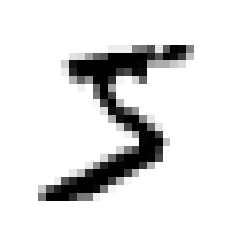

(None, 5)

In [69]:
plot_digit(X[0]), y[0]
# label is a string, for training int is needed !

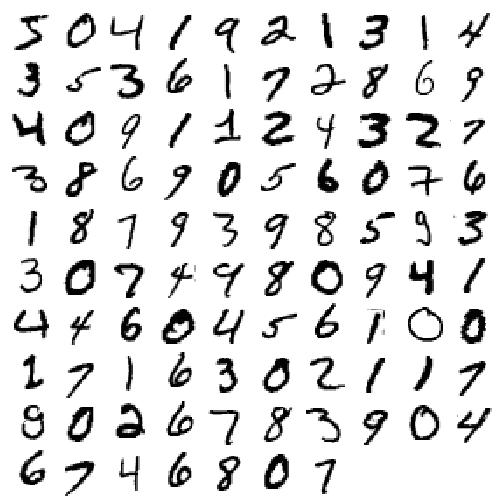

In [75]:
plt.figure(figsize=(9,9))
example_images = X[:97]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

In [7]:
import numpy as np
y = y.astype(np.uint8)

In [8]:
# create test set as set it aside
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = ( y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(index):
    some_digit = X[index]
    some_digit_image = some_digit.reshape(28, 28)
    
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

In [13]:
some_digit = X[0]

In [14]:
def create_digit_image(index):
    some_digit = X[index]
    some_digit_image = some_digit.reshape(28, 28)
    return some_digit_image

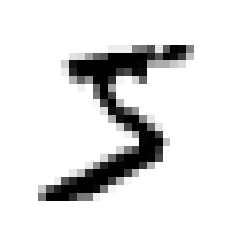

(None, 5)

In [15]:
plot_digit(0), y[0]
# label is a string, for training int is needed !

In [16]:
import numpy as np
y = y.astype(np.uint8)

In [17]:
# create test set as set it aside
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
y_train_5 = ( y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
#print (sgd_clf.predict(X_train[:10]), y_train_5[:10])

correct = sgd_clf.predict(X_train) == y_train_5
sum(correct) / X_train.shape[0]



0.9522666666666667

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [22]:
# use cross_val_score() to evaluate SGDClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [23]:
# Check BaseEstimator
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [25]:
# Confusion matrix
from sklearn.model_selection import cross_val_predict

# we need a set of predictions 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# Each row    -> actual    class
# Each column -> predicted class


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [27]:
# confusion matrix for perfect predictions is diagonal,
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [29]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [30]:
# f1 = TP/(TP + (FN+FP)/2)
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [31]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [32]:
threshold = 0
y_some_digit_pred = (y_scores >= threshold)
y_some_digit_pred 

array([ True])

In [33]:
threshold = 8000
y_some_digit_pred = (y_scores >= threshold)
y_some_digit_pred 

array([False])

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [35]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    


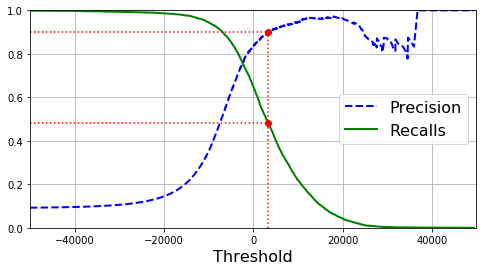

In [37]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")

plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")

#save_fig("precision_recall_vs_threshold_plot")
plt.show()



In [38]:
cutoff=0.9
print(recall_90_precision, threshold_90_precision)
print(cutoff, threshold_90_precision)

0.4799852425751706 3370.0194991439557
0.9 3370.0194991439557


In [39]:
def plot_precision_recall_vs_threshold_for_cutoff(precisions=precisions, recalls=recalls, thresholds=thresholds, 
                                                  cutoff=0.90, annotate=True):
    recall_cutoff_precision = recalls[np.argmax(precisions >= cutoff)]
    threshold_cutoff_precision = thresholds[np.argmax(precisions >= cutoff)]
    
    #print(str((round(threshold_cutoff_precision, 3), round(recall_cutoff_precision, 3))))
    
    plt.figure(figsize=(8, 4))
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.plot([threshold_cutoff_precision, threshold_cutoff_precision], [0., cutoff], "r:")

    plt.plot([-50000, threshold_cutoff_precision], [cutoff, cutoff], "r:")
    plt.plot([-50000, threshold_cutoff_precision], [recall_cutoff_precision, recall_cutoff_precision], "r:")
    plt.plot([threshold_cutoff_precision], [cutoff], "ro")
    plt.plot([threshold_cutoff_precision], [recall_cutoff_precision], "ro")
    if annotate:
        plt.annotate(str((round(threshold_cutoff_precision, 3), round(recall_cutoff_precision, 3))), 
                     xy=(threshold_cutoff_precision, recall_cutoff_precision), xycoords='data', 
                     textcoords='offset points', xytext=(30, -40), 
                     arrowprops=dict(facecolor='red', shrink=0.1),
                    horizontalalignment='left', verticalalignment='bottom')
    #save_fig("precision_recall_vs_threshold_plot")
    plt.show()

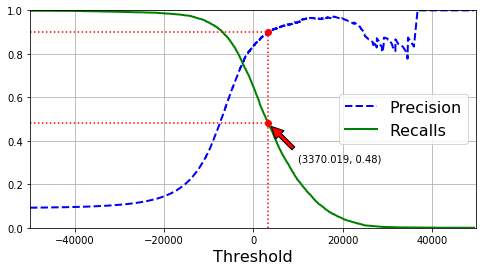

In [40]:
plot_precision_recall_vs_threshold_for_cutoff()

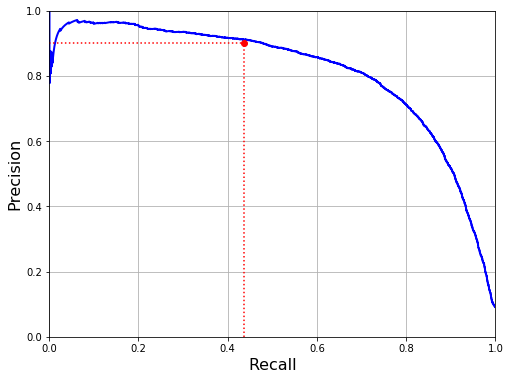

In [41]:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()



In [42]:
# Receiver operatign characteristic ( ROC ) curve
# plots True positive rate ( recall ) vs False Positive Rate
# TPR vs FPR
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed original
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    

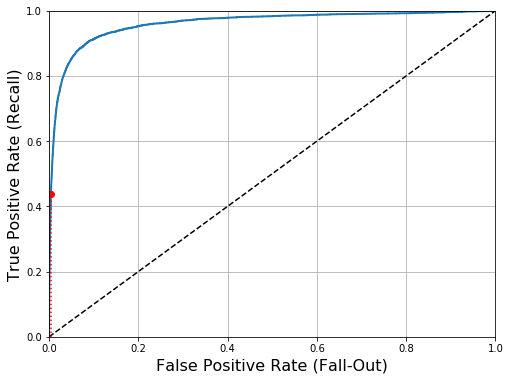

In [44]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [45]:
# The higher the recall ( TPR ), the more false positives ( FPR ) classifier produces.
# Dotted line represents ROC curve of a purely random classifier
# Good classifer stays as far away from that line as possible, towards top-left corner

In [46]:
# Measure area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [47]:
# Train RandomForestClassifier and compare 
# its ROC curve to ROC AUC score of SGDClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


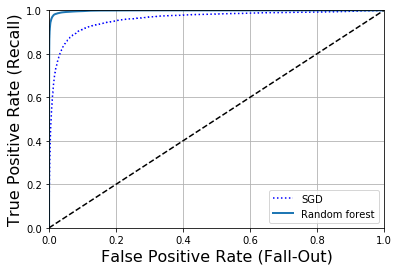

In [48]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random forest")
plt.legend(loc="lower right")
plt.show()

In [49]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [50]:
forest_precisions, forest_recalls, forest_thresholds = precision_recall_curve(y_train_5, y_scores_forest)

In [51]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [52]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [54]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [56]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

[array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]]), array([[ 9.31776763,  0.69966542,  8.26937495,  3.82063539, -0.30671293,
         7.27141643,  3.80978873,  1.72165536,  6.0316466 ,  3.83885601]]), array([[ 0.71537935, -0.29662415,  5.21971626,  6.21824425,  9.30389385,
         3.80284658,  1.79830476,  7.24440738,  2.74262663,  8.25740666]]), array([[-0.30461154,  9.31250893,  6.25161472,  4.80442191,  4.82807564,
         1.72567445,  0.71707527,  8.26892742,  6.28488102,  2.72424781]]), array([[-0.3072346 ,  2.72940761,  2.72002558,  4.87604398,  8.30262765,
         2.7690617 ,  0.697264  ,  7.26676236,  6.27772212,  9.31277815]]), array([[ 2.7442516 , -0.30125634,  9.31399134,  7.26965016,  3.75753908,
         3.74771902,  0.71155138,  2.76650678,  8.2765048 ,  6.21840456]]), array([[-0.31693195,  9.31618719,  5.11128022,  7.29465689,  3.81901753,
         1.75872355,  0.71796394

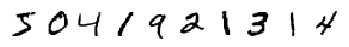

In [90]:
decision_functions = [svm_clf.decision_function([X[ind]]) for ind in range(10)]
print(decision_functions)
decisions = np.argmax(decision_functions, axis=2)
decisions = decisions.reshape(-1)
plot_digits(X[:10])
print(decisions)

In [89]:
decisions.reshape(-1)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

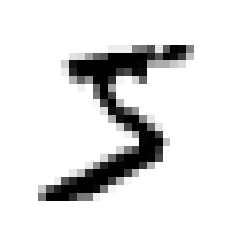

5

In [64]:
# highest score for is for class corresposnding to 5
plot_digit(some_digit)
np.argmax(some_digit_scores)


In [92]:
# Force scikit-learn to use OneVsOneClassifier or OneVsRestClassifier

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print(ovr_clf.predict([X[0]]))
print(len(ovr_clf.estimators_))

[5]
10


In [93]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([X[0]]))
# sgd classifier can directly classify instances into multiple classes
sdecision_functionf.decision_function([X[0]])

[3]


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [94]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [95]:
# Stasklearnization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [96]:
# Error analysis, cofusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

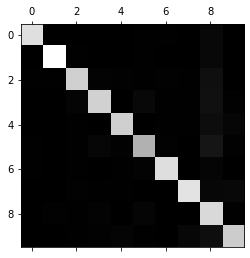

In [97]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

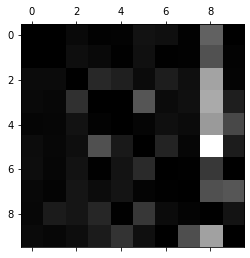

In [98]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [103]:
def plot_missmatched_digits(cl_a=3, cl_b=5):
    #cl_a, cl_b = 3, 5
    X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
    X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
    X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
    X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

    plt.figure(figsize=(8,8))
    plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
    plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
    plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
    plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)


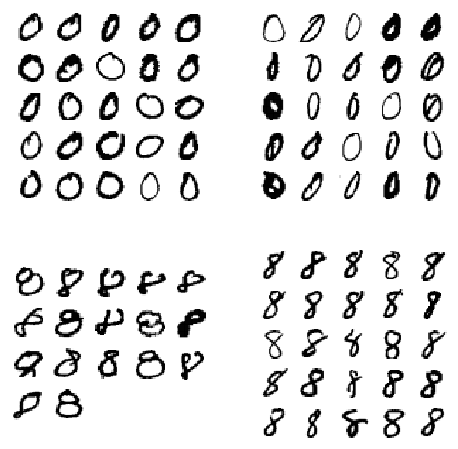

In [106]:
plot_missmatched_digits(cl_a=0, cl_b=8)

In [107]:
np.c_?

In [108]:
# Multilabel Classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
# y_multilabel array contains 2 target labels for each digit
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([X[0]])


array([[False,  True]])

In [109]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605